<a href="https://colab.research.google.com/github/MAI0881/european_energy/blob/main/energy_european.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importação de pacotes e dataframes**

In [20]:
install.packages("readr")
install.packages("tidytuesdayR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [21]:
library(readr)
library(tidytuesdayR)
library(dplyr)
library(ggplot2)

In [70]:
energy_types <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-08-04/energy_types.csv')
country_totals <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-08-04/country_totals.csv')

## **Entendimento dos dados**

In [ ]:
summary(energy_types) #gerar um resumo estatístico dos data frames energy_types
summary(country_totals) #gerar um resumo estatístico dos data frames country_totals

In [ ]:
dim(energy_types) #retorna o número de linhas e colunas do df
dim(country_totals) #retorna o número de linhas e colunas do df

In [ ]:
str(energy_types) #imprimir a estrutura do df 
str(country_totals) #imprimir a estrutura do df 

In [ ]:
#energy_types
country_totals

## **Tranformação dos dados**

In [71]:
# Utiliza o operador %>% para aplicar a função "mutate" ao dataframe "energy_types".
energy_types <- energy_types %>% #A nova coluna "media_total" é calculada usando a função "rowMeans" e selecionando as colunas "X2016:X2018" do dataframe "energy_types".
mutate(media_total = rowMeans(select(energy_types, X2016:X2018))) ##A função "rowMeans" calcula a média de cada linha do dataframe "energy_types" para as colunas selecionadas (X2016:X2018) e armazena o resultado na nova coluna "media_total".

In [72]:
# Utiliza o operador %>% para aplicar a função "mutate" ao dataframe "country_totals".
country_totals <- country_totals %>% #A nova coluna "media_total" é calculada usando a função "rowMeans" e selecionando as colunas "X2016:X2018" do dataframe "country_totals".
mutate(media_total = rowMeans(select(country_totals, X2016:X2018))) #A função "rowMeans" calcula a média de cada linha do dataframe "country_totals" para as colunas selecionadas (X2016:X2018) e armazena o resultado na nova coluna "media_total".

In [73]:
#Utiliza a função "na.omit" para remover todas as linhas do dataframe "energy_types" e do dataframe "country_totals" que contenham valores ausentes (NA).
energy_types <- na.omit(energy_types) 
country_totals <- na.omit(country_totals)

#Calcula o número de valores ausentes em cada coluna do dataframe "energy_types" e "country_totals" usando a função "colSums". Se a soma for maior que zero, significa que há valores ausentes na coluna. Caso contrário, a soma será igual a zero, indicando que não há valores ausentes na coluna após a remoção dos dados ausentes com a função "na.omit".
colSums(is.na(energy_types))
colSums(is.na(country_totals))

country country_name         type        level        X2016        X2017 
           0            0            0            0            0            0 
       X2018  media_total 
           0            0

country country_name         type        level        X2016        X2017 
           0            0            0            0            0            0 
       X2018  media_total 
           0            0

In [92]:
country_totals$dif_anos <- country_totals$X2018 - country_totals$X2016 #Cria uma nova coluna "dif_anos" no dataframe "country_totals" que contém a diferença entre os valores da coluna "X2018" e "X2016" para cada linha do dataframe "country_totals".

In [75]:
energy_types$media_norm <- scale(energy_types$media_total) #Utiliza a função "scale" para padronizar a coluna "media_total" do dataframe "energy_types"

In [ ]:
energy_types

## **Distribuição da produção de energia**

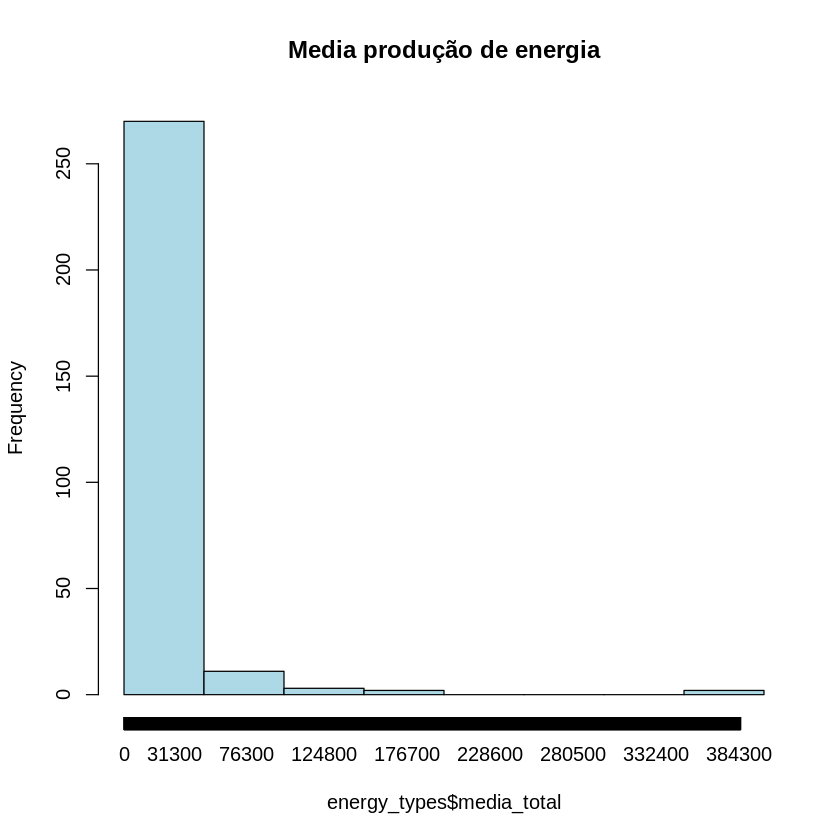

In [111]:
# Criando um histograma da média da produção de energia
hist(energy_types$media_total, 
     main = 'Media produção de energia',  # Adiciona um título ao gráfico
     col = 'lightblue',  # Define a cor das barras do histograma
     breaks = 8,  # Define o número de intervalos do histograma
     xaxt = 'n'  # Remove o eixo x padrão para que possamos personalizá-lo depois
)

# Adicionando um eixo x personalizado ao gráfico
axis(side = 1,  # Define a posição do eixo (1 = inferior)
     at = seq(min(energy_types$media_total), max(energy_types$media_total), by = 100),  # Define os intervalos do eixo x
     labels = seq(min(energy_types$media_total), max(energy_types$media_total), by = 100)  # Define os rótulos do eixo x
)


Observando que os valores de produção de energia estão concentrados em torno de `31.300 GWh` e a minoria está entre `228.600 GWh e 332.400 GWh`, isso pode indicar que existe uma `variação` significativa na produção de energia.

A concentração dos valores em torno de 31.300 GWh sugere que há um padrão regular de produção de energia que é consistente entre os países. No entanto, a presença de valores extremos, como 228.600 GWh e 332.400 GWh, indica que há flutuações significativas na produção de energia que podem ser causadas por peculiaridades referentes ao países analisados. Alguns fatores podem ser: maior presença de recursos naturais em algumas regiões, maior tecnologia e infraestrutura, maior demanda de energia, políticas energéticas incluindo o incentivo a fontes renováveis de energia, clima e condições geográficas favoráveis  e disponibilidade de investimento em energia nesses países.



## **Análise quantitativa**

In [ ]:
# Cria um gráfico de barras horizontais para os países que têm dados de exportação de energia

barplot(country_totals[country_totals$type %in% c('Exports'),]$media_total, # A condição country_totals$type %in% c('Exports') seleciona apenas os países que têm dados de exportação de energia
        names.arg=country_totals[country_totals$type %in% c('Exports'),]$country_name, # names.arg é o vetor com o nome dos países que serão exibidos no eixo y do gráfico
        col='blue', # col define a cor das barras 
        horiz= T, las=1, # horiz define a orientação horizontal das barras e las define a orientação dos rótulos no eixo y
        main='Média de exportação de energia por país', # main é o título do gráfico
        cex.names= 0.8) # cex.names define o tamanho do texto dos rótulos no eixo y

# Cria um gráfico de pontos horizontais usando a função dotchart do R

dotchart(country_totals[country_totals$type %in% c('Exports'),]$media_total, # A função usa a coluna media_total do dataframe country_totals, apenas para a categoria 'Exports'
         label=country_totals[country_totals$type %in% c('Exports'),]$country_name, # A função usa a coluna country_name do dataframe country_totals, apenas para a categoria 'Exports'
         col='blue', # Define a cor azul para os pontos
         main='Média de exportação de energia por país', # Define o título do gráfico como 'Média de exportação de energia por país'
         cex= 0.8) # Define o tamanho da fonte dos nomes dos países como 0.9


Observando a média de `exportação` dos países, vemos que a Alemanha, França, Suécia, Noruega e República Checa são os maiores exportadores de energia e  Irlanda, Montenegro, Chipre, Georgia  e Albania são os menores exportadores.

Isso indica que há uma grande `discrepância` entre os países em termos de exportação de energia. Os países listados como maiores exportadores de energia parecem ter uma capacidade significativamente maior de gerar energia do que os menores exportadores, o que pode ser devido a diversos fatores citados anteriormente
Além disso, é possível que os maiores exportadores também tenham uma demanda menor de energia interna em relação à sua capacidade de geração, o que os permite exportar mais energia para outros países. Por outro lado, os menores exportadores podem ter uma demanda interna maior do que sua capacidade de geração, o que os leva a importar energia de outros países.

Essas diferenças na capacidade de geração e na demanda interna de energia podem ter impactos significativos na `economia `e na `política` dos países, bem como na `segurança energética regional e global`.

In [ ]:
# Cria um gráfico de barras horizontais para os países que têm dados de importação de energia
barplot(country_totals[country_totals$type %in% c('Imports'),]$media_total, # A condição country_totals$type %in% c('Imports') seleciona apenas os países que têm dados de importação de energia
        names.arg=country_totals[country_totals$type %in% c('Imports'),]$country_name, # names.arg é o vetor com o nome dos países que serão exibidos no eixo y do gráfico
        col='blue', # col define a cor das barras 
        horiz= T, las=1, # horiz define a orientação horizontal das barras e las define a orientação dos rótulos no eixo y
        main='Média de importação de energia por país', # main é o título do gráfico
        cex.names= 0.8) # cex.names define o tamanho do texto dos rótulos no eixo y

# Cria um gráfico de pontos horizontais usando a função dotchart do R
dotchart(country_totals[country_totals$type %in% c('Imports'),]$media_total, # A função usa a coluna media_total do dataframe country_totals, apenas para a categoria 'Imports'
         label=country_totals[country_totals$type %in% c('Imports'),]$country_name, # A função usa a coluna country_name do dataframe country_totals, apenas para a categoria 'Imports'
         col='blue', # Define a cor azul para os pontos
         main='Média de importação de energia por país', # Define o título do gráfico como 'Média de importação de energia por país'
         cex= 0.8) # Define o tamanho da fonte dos nomes dos países como 0.9

Observando a média de `importação` de energia percebemos que a Itália, Alemanha, Áustria, Holanda e Espanha possuem uma `demanda` maior por energia do que a produção interna desses países, e por isso precisam importar energia de outros países. Já Chipre, Ucrânia, Malta, Irlanda e Albânia têm uma demanda menor por energia, o que pode estar relacionado aos diversos fatores abordados na análise de` distribuição` dos dados.

A `dependência` de importação de energia pode afetar negativamente a economia e a segurança energética de um país, além de deixá-lo vulnerável a choques geopolíticos. Por outro lado, a produção de energia local pode trazer benefícios econômicos, segurança energética e autonomia política.

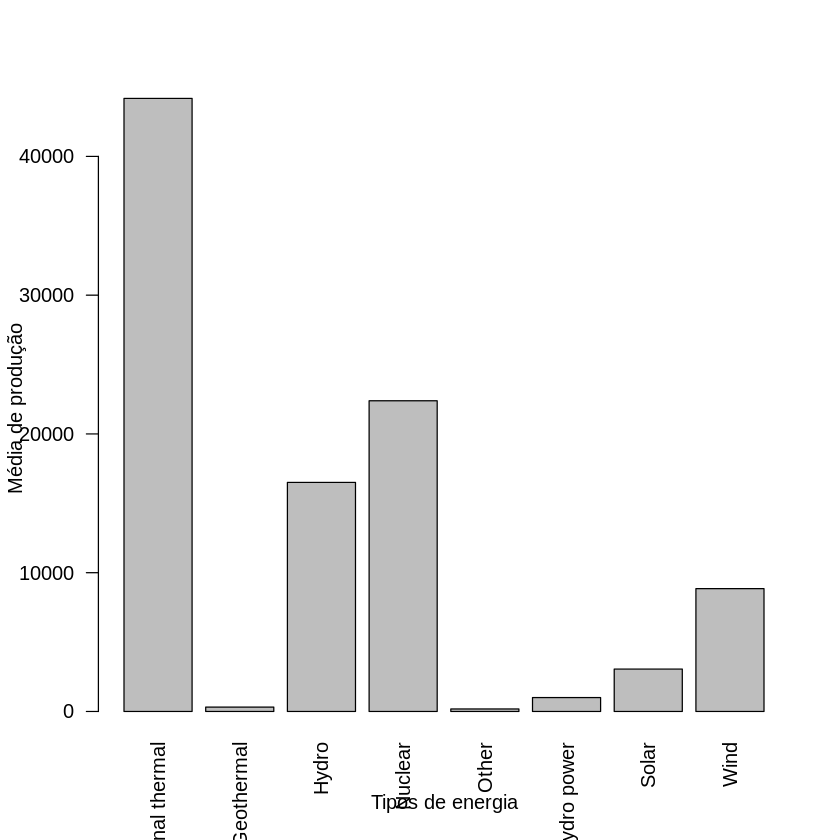

In [54]:
media <- aggregate(energy_types[, c("media_total")], by = list(energy_types$type), FUN = mean) # Agrupando as colunas por tipo de energia e tirando a média

colnames(media) <- c("tipos de energia", "media produção") # Renomeando as colunas do objeto media

# Criando um gráfico de barras com as médias de produção por tipo de energia
barplot(
  media$`media produção`, # Selecionando as médias de produção para cada tipo de energia
  names.arg = media$`tipos de energia`, # Definindo os rótulos do eixo x
  xlab = "Tipos de energia", # Definindo o rótulo do eixo x
  ylab = "Média de produção", # Definindo o rótulo do eixo y
  las = 2 # Rotacionando os rótulos do eixo x em 90 graus
)

Observando o gráfico é possível notar que a produção de energia a partir de `fontes convencionais`, como carvão e gás natural, é a mais comum em comparação com outras fontes de energia. Além disso, a energia nuclear e hidrelétrica também são bastante utilizadas como fontes de energia. Por outro lado, a energia geotérmica, hidrelétrica bombeada e solar são fontes menos utilizadas para a produção de energia.

O fato de fontes convencionais, energia nuclear e hidrelétrica serem os tipos de energia mais produzidos pode indicar que essas fontes são mais `acessíveis`, mais `baratas` ou mais `abundantes` nos países em questão. No entanto, a dependência excessiva de algumas fontes de energia pode trazer riscos de escassez em caso de eventos climáticos extremos, bem como gerar impactos ambientais negativos. 
Por outro lado, o investimento em fontes menos produzidas, como energia geotérmica, hidrelétrica bombeada e solar, pode trazer benefícios a longo prazo, como a diversificação da ` matriz energética` e a redução da emissão de gases de efeito estufa.

## **Análise de correlação**

In [90]:
energ_renovavel <- subset(energy_types, type == "Geothermal" | type == "Hydro" | type == "Solar" | type == "Hydro" | type == "Wind", c('media_norm') ) #Cria um novo dataframe "energ_renovavel" com uma seleção das linhas do dataframe "energy_types" em que o valor da coluna "type" é igual a "Geothermal", "Hydro", "Solar", 
names(energ_renovavel)[1] <- "renovavel" #Apenas a coluna "media_norm" é mantida no novo dataframe "energ_renovavel" e a primeira coluna do dataframe "energ_renovavel" é renomeada para "renovavel".
energ_n_renovavel <- subset(energy_types, type == "Conventional thermal" | type == "Nuclear" | type == "Pumped hydro power" | type == "Other", c('media_norm') ) #Cria um novo dataframe "energ_n_renovavel" com uma seleção das linhas do dataframe "energy_types" em que o valor da coluna "type" é igual a "Conventional thermal", "Nuclear", "Pumped hydro power" ou "Other".
names(energ_n_renovavel)[1] <- "n_renovavel" # Apenas a coluna "media_norm" é mantida no novo dataframe "energ_n_renovavel" e a primeira coluna do dataframe "energ_n_renovavel" é renomeada para "n_renovavel".

df_concatenado <- cbind(energ_renovavel, energ_n_renovavel) #O novo dataframe "energ_renovavel" e o novo dataframe "energ_n_renovavel" são combinados em um único dataframe chamado "df_concatenado" utilizando a função "cbind", onde a primeira coluna é "renovavel" e a segunda coluna é "n_renovavel".

In [112]:
energ_renovavel <- subset(energy_types, type == "Geothermal" | type == "Hydro" | type == "Solar" | type == "Hydro" | type == "Wind", c('media_norm') ) #Cria um novo dataframe "energ_renovavel" com uma seleção das linhas do dataframe "energy_types" em que o valor da coluna "type" é igual a "Geothermal", "Hydro", "Solar", 
names(energ_renovavel)[1] <- "renovavel" #Apenas a coluna "media_norm" é mantida no novo dataframe "energ_renovavel" e a primeira coluna do dataframe "energ_renovavel" é renomeada para "renovavel".
energ_n_renovavel <- subset(energy_types, type == "Conventional thermal" | type == "Nuclear" | type == "Pumped hydro power" | type == "Other", c('media_norm') ) #Cria um novo dataframe "energ_n_renovavel" com uma seleção das linhas do dataframe "energy_types" em que o valor da coluna "type" é igual a "Conventional thermal", "Nuclear", "Pumped hydro power" ou "Other".
names(energ_n_renovavel)[1] <- "n_renovavel" # Apenas a coluna "media_norm" é mantida no novo dataframe "energ_n_renovavel" e a primeira coluna do dataframe "energ_n_renovavel" é renomeada para "n_renovavel".

df_concatenado <- cbind(energ_renovavel, energ_n_renovavel) #O novo dataframe "energ_renovavel" e o novo dataframe "energ_n_renovavel" são combinados em um único dataframe chamado "df_concatenado" utilizando a função "cbind", onde a primeira coluna é "renovavel" e a segunda coluna é "n_renovavel".

In [114]:
df_concatenado

,renovavel,n_renovavel
,"<dbl[,1]>","<dbl[,1]>"
3,-0.27143240,0.47310824
5,-0.14605420,0.61191613
6,-0.22284111,-0.27895520
7,-0.30589574,-0.29587325
11,-0.19866240,0.18852191
13,-0.26991970,0.07406958
14,-0.27349862,-0.28721288
15,-0.30589574,-0.30513580
19,-0.23126829,0.90405257


In [110]:
#Utiliza a função "cor" para calcular a correlação entre duas colunas do dataframe "df_concatenado", a coluna "renovavel" e a coluna "n_renovavel".
cor(df_concatenado$renovavel, df_concatenado$n_renovavel)

0.3308666


Na tentativa de investigar se existe correlação entre o aumento na produção de energia renovável e redução na produção de energia não renovável vimos que a correlação de 0.3308666 indica que há uma correlação `positiva fraca` entre os dois tipoes de produção, ou seja, à medida que a produção de energia renovável aumenta, a produção de energia não renovável também tende a aumentar, mas a relação não é muito forte. 
Isso indica que a produção de energia renovável e não renovável pode ser influenciada por diversos fatores, assim, é possível que um país aumente a produção de energia renovável sem necessariamente reduzir (e até aumentar) a produção de energia não renovável, ou vice-versa.



## **Análise do atributo derivado**



In [ ]:
absorbed <- subset(country_totals, type == "Energy absorbed by pumping", c('country_name','dif_anos') ) # um subconjunto da tabela country_totals é criado com apenas as linhas que contêm o tipo "Energy absorbed by pumping" na coluna "type" e apenas as colunas "country_name" e "dif_anos".

increased <- subset(absorbed, dif_anos > 0 , c('country_name','dif_anos') ) #um novo subconjunto da tabela absorbed é criado com apenas as linhas que têm um valor positivo na coluna "dif_anos", ou seja, os países onde a absorção de energia por bombeamento aumentou nos últimos anos. 
increased <- increased[order(increased$dif_anos), ] #linhas ordenadas de acordo com o valor crescente de "dif_anos" 
colnames(increased) <- c("regrediram ", "aumento_na_absorção") #colunas renomeadas para "regrediram" e "aumento_na_absorção".


decreased <- subset(absorbed, dif_anos < 0, c('country_name','dif_anos') ) # subconjunto da tabela absorbed é criado com apenas as linhas que têm um valor negativo na coluna "dif_anos", ou seja, os países onde a absorção de energia por bombeamento diminuiu nos últimos anos.
decreased <- decreased[order(decreased$dif_anos), ] #linhas ordenadas de acordo com o valor crescente de "dif_anos" 
colnames(decreased) <- c("progrediram", "redução_na_absorção") #colunas são renomeadas para "progrediram" e "redução_na_absorção".

In [96]:
increased
decreased

,regrediram,aumento_na_absorção
,<chr>,<dbl>
164,Serbia,38.938
109,Portugal,45.000
174,Bosnia & Herzegovina,50.591
124,Slovakia,67.000
184,Georgia,214.946
49,France,607.732
24,Germany,850.706
99,Austria,862.554


,progrediram,redução_na_absorção
,<chr>,<dbl>
179,Ukraine,-1633.000
44,Spain,-1621.364
114,Romania,-660.000
9,Bulgaria,-493.000
144,Norway,-405.508
59,Italy,-235.000
79,Luxembourg,-225.014
14,Czechia,-197.116
54,Croatia,-175.448


A redução da energia absorvida pelo bombeamento pode trazer vários benefícios para os países em termos de produção e economia de energia assim como seu aumento acaba comprometendo o melhor aproveitamente dos recursos para a produção de energia.
Algumas das vantagens dos países que conseguem reduzir esse indicar é `redução de custos` (quando a energia absorvida pelo bombeamento é reduzida, os custos associados ao bombeamento de líquidos também são reduzidos.), maior `eficiência energética` (significa que menos energia é necessária para realizar o mesmo trabalho) e `menor dependência de combustíveis fósseis` (quando os países reduzem a energia absorvida pelo bombeamento, eles podem reduzir sua dependência de combustíveis fósseis, como o petróleo. Isso pode ser especialmente importante para os países que não têm fontes de energia abundantes e precisam importar combustíveis fósseis para atender às suas necessidades energéticas).

## **Análise de evolução**

In [94]:
#Utiliza a função "subset" para criar dois novos dataframes: "energ_renovavel" e "energ_n_renovavel", a partir do dataframe "energy_types". O primeiro é criado selecionando as linhas cujo tipo de energia é "Geothermal", "Hydro", "Solar", ou "Wind", e as colunas correspondentes aos anos de 2016, 2017 e 2018.
energ_renovavel <- subset(energy_types, type == "Geothermal" | type == "Hydro" | type == "Solar" | type == "Hydro" | type == "Wind", c('X2016','X2017','X2018') )
#O segundo dataframe é criado selecionando as linhas cujo tipo de energia é "Conventional thermal", "Nuclear", "Pumped hydro power", ou "Other", e as mesmas colunas de anos.
energ_n_renovavel <- subset(energy_types, type == "Conventional thermal" | type == "Nuclear" | type == "Pumped hydro power" | type == "Other", c('X2016','X2017','X2018') )
#Cria um novo dataframe "media_energ_renovav", que contém duas colunas: "ano" (que armazena os anos 2016, 2017 e 2018) e "media" (que armazena as médias dos valores de energia renovável para cada ano, calculados a partir do dataframe "energ_renovavel").
media_energ_renovav <- data.frame(ano = c(2016, 2017, 2018),
media = c(mean(energ_renovavel$X2016), mean(energ_renovavel$X2017), mean(energ_renovavel$X2018)))
#Cria um novo dataframe "media_energ", que contém três colunas: "ano" (que armazena os anos 2016, 2017 e 2018), "media_energ_renovav" (que armazena as médias dos valores de energia renovável para cada ano, obtidas a partir do dataframe "media_energ_renovav"), 
media_energ <- data.frame(ano = c(2016, 2017, 2018), media_energ_renovav = media_energ_renovav$media,
#e "media_energ_n_renovav" (que armazena as médias dos valores de energia não renovável para cada ano, calculados a partir do dataframe "energ_n_renovavel"). Note que o valor de "media_energ_renovav" é obtido do dataframe criado anteriormente.
media_energ_n_renovav = c(mean(energ_n_renovavel$X2016), mean(energ_n_renovavel$X2017), mean(energ_n_renovavel$X2018)))
media_energ

ano,media_energ_renovav,media_energ_n_renovav
<dbl>,<dbl>,<dbl>
2016,7057.940,16946.59
2017,6994.889,17278.35
2018,7495.126,16586.70


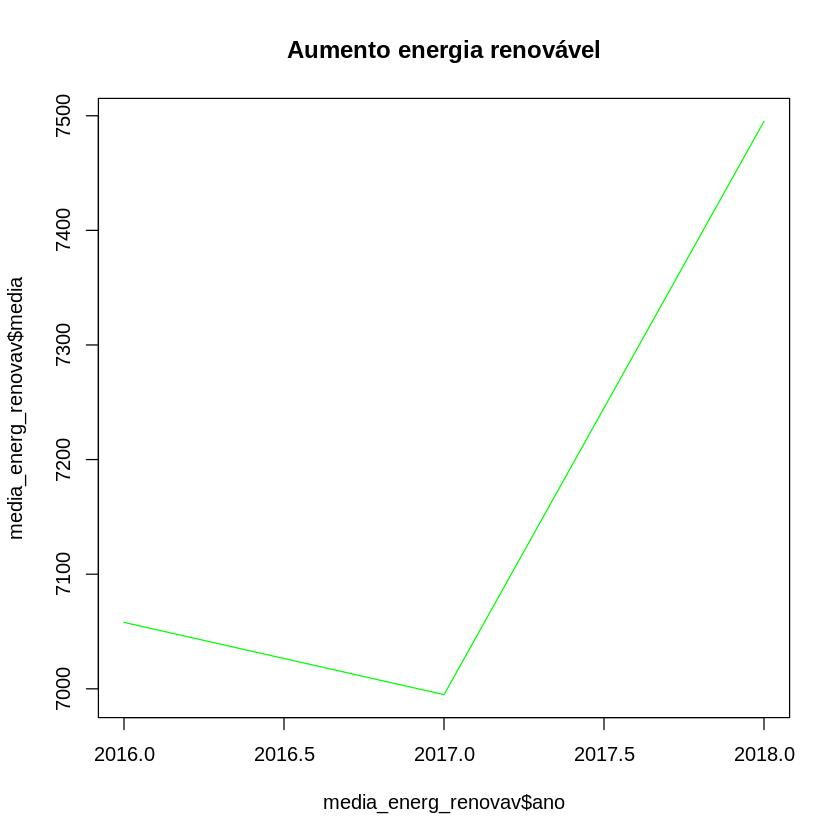

In [95]:
plot(media_energ_renovav$ano, media_energ_renovav$media, #plot() é uma função para plotar gráficos em R. media_energ_renovav$ano e media_energ_renovav$media são as variáveis a serem plotadas no gráfico.
type = 'l', #define o tipo de gráfico como uma linha.
 main= 'Aumento energia renovável', #define o título do gráfico como 'titulo'.
 col='green' #define a cor da linha como verde.
 )


Esses valores representam a quantidade total de energia renovável produzida nos anos de 2016, 2017 e 2018, respectivamente. O gráfico indica uma tendência a `aumentar` a produção de energia renovável ao longo do tempo. Podemos observar que em 2017 a produção reduziu mas voltou a aumentar no ano seguinte. É necessário uma análise contínua e levando em consideração um tempo maior para definir o impacto e confirmar a hipótese de aumento na tendência.